In [ ]:
#title: Homework 1
#author: Yarkın Erdoğan
#date: 11/20/2020

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import poisson
from natsort import natsorted

In [3]:
df=pd.read_csv("merged.csv",error_bad_lines=False)


b'Skipping line 382: expected 62 fields, saw 105\nSkipping line 383: expected 62 fields, saw 105\nSkipping line 384: expected 62 fields, saw 105\nSkipping line 385: expected 62 fields, saw 105\nSkipping line 386: expected 62 fields, saw 105\nSkipping line 387: expected 62 fields, saw 105\nSkipping line 388: expected 62 fields, saw 105\nSkipping line 389: expected 62 fields, saw 105\nSkipping line 390: expected 62 fields, saw 105\nSkipping line 391: expected 62 fields, saw 105\nSkipping line 392: expected 62 fields, saw 105\nSkipping line 393: expected 62 fields, saw 105\nSkipping line 394: expected 62 fields, saw 105\nSkipping line 395: expected 62 fields, saw 105\nSkipping line 396: expected 62 fields, saw 105\nSkipping line 397: expected 62 fields, saw 105\nSkipping line 398: expected 62 fields, saw 105\nSkipping line 399: expected 62 fields, saw 105\nSkipping line 400: expected 62 fields, saw 105\nSkipping line 401: expected 62 fields, saw 105\nSkipping line 402: expected 62 fields,

In [ ]:
#Task 1

In [4]:
df.shape

(380, 62)

In [5]:
df.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


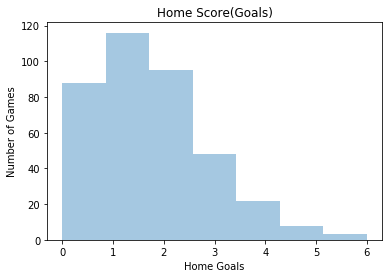

In [6]:
k=sns.distplot(df.FTHG,kde=False,bins=7);
k.set_xlabel("Home Goals")
k.set_ylabel("Number of Games")
k.set_title("Home Score(Goals)");

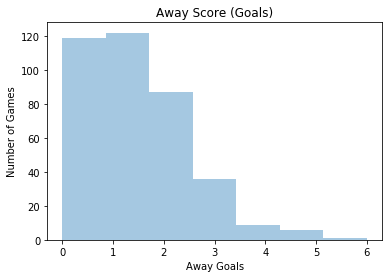

In [7]:
s=sns.distplot(df.FTAG,kde=False,bins=7);
s.set_xlabel("Away Goals")
s.set_ylabel("Number of Games")
s.set_title("Away Score (Goals)");

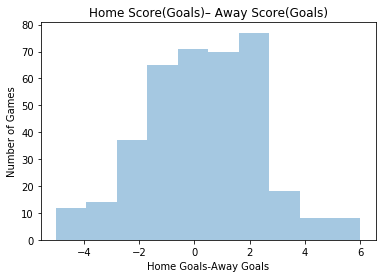

In [8]:
m=sns.distplot(df.FTHG-df.FTAG,kde=False,bins=10);
m.set_xlabel("Home Goals-Away Goals")
m.set_ylabel("Number of Games")
m.set_title("Home Score(Goals)– Away Score(Goals)");

In [9]:
df["FTHG"].value_counts()

1    116
2     95
0     88
3     48
4     22
5      8
6      3
Name: FTHG, dtype: int64

In [431]:
df["FTAG"].mean()    

1.2526315789473683

In [432]:
df["FTHG"].mean()

1.568421052631579

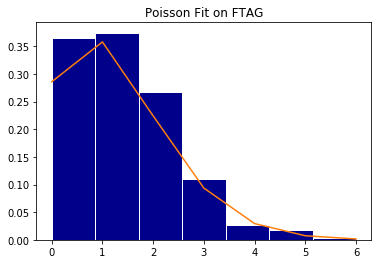

In [13]:
x=df["FTAG"]
bins = 7
n, bins_edges,patches = plt.hist(x,bins,density=1, facecolor='darkblue', ec='white', log=0)
mu=df["FTAG"].mean()
x_plot = np.arange(0, max(df["FTAG"]+1))
plt.plot(x_plot, poisson.pmf(x_plot, mu), label='Poisson')
plt.title('Poisson Fit on FTAG')
plt.show()

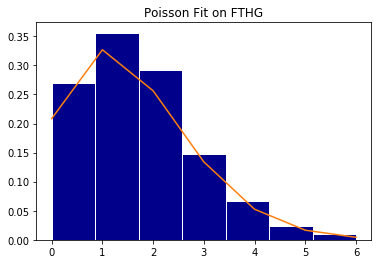

In [14]:
x2=df["FTHG"]
bins = 7
n, bins_edges,patches = plt.hist(x2,bins,density=1, facecolor='darkblue', ec='white', log=0)
mu2=df["FTHG"].mean()
x2_plot = np.arange(0, max(df["FTHG"]+1))
plt.plot(x2_plot, poisson.pmf(x2_plot, mu2), label='Poisson')
plt.title('Poisson Fit on FTHG')
plt.show()

In [102]:
#Task 2

In [103]:
#BW

In [17]:
bwh=1/df["BWH"]

In [18]:
bwh.head()

0    0.653595
1    0.526316
2    0.408163
3    0.160000
4    0.263158
Name: BWH, dtype: float64

In [19]:
bwd=1/df["BWD"]

In [20]:
bwd.head()

0    0.250000
1    0.294118
2    0.303030
3    0.256410
4    0.285714
Name: BWD, dtype: float64

In [21]:
bwa=1/df["BWA"]
bwa.head()

0    0.133333
1    0.227273
2    0.338983
3    0.636943
4    0.500000
Name: BWA, dtype: float64

In [22]:
#Calculating BW values using Normalization

In [23]:
tbw=bwh+bwa+bwd

In [24]:
tbw_=1/tbw

In [25]:
new_bwh=tbw_*bwh

In [26]:
new_bwd=tbw_*bwd

In [27]:
new_bwa=tbw_*bwa

In [28]:
#IW

In [29]:
iwh=1/df["IWH"]
iwh.head()

0    0.645161
1    0.526316
2    0.416667
3    0.161290
4    0.270270
Name: IWH, dtype: float64

In [30]:
iwd=1/df["IWD"]
iwd.head()

0    0.263158
1    0.285714
2    0.303030
3    0.250000
4    0.298507
Name: IWD, dtype: float64

In [31]:
iwa=1/df["IWA"]
iwa.head()

0    0.142857
1    0.243902
2    0.338983
3    0.645161
4    0.487805
Name: IWA, dtype: float64

In [32]:
#Calculating IW values using Normalization

In [33]:
tiw=iwh+iwd+iwa

In [34]:
tiw_=1/tiw

In [35]:
new_iwh=tiw_*iwh

In [36]:
new_iwd=tiw_*iwd

In [37]:
new_iwa=tiw_*iwa

In [38]:
#PS

In [39]:
psh=1/df["PSH"]
psh.head()

0    0.632911
1    0.529101
2    0.400000
3    0.156006
4    0.261097
Name: PSH, dtype: float64

In [40]:
psd=1/df["PSD"]
psd.head()

0    0.254453
1    0.275482
2    0.289017
3    0.248756
4    0.280112
Name: PSD, dtype: float64

In [41]:
psa=1/df["PSA"]
psa.head()

0    0.133333
1    0.218341
2    0.333333
3    0.617284
4    0.480769
Name: PSA, dtype: float64

In [42]:
#Calculating PS values using Normalization

In [43]:
tps=psh+psd+psa

In [44]:
tps_=1/tps

In [45]:
new_psh=tps_*psh

In [46]:
new_psd=tps_*psd

In [47]:
new_psa=tps_*psa

In [48]:
#WH

In [49]:
whh=1/df["WHH"]
whh.head()

0    0.636943
1    0.523560
2    0.408163
3    0.172414
4    0.263158
Name: WHH, dtype: float64

In [50]:
whd=1/df["WHD"]
whd.head()

0    0.263158
1    0.285714
2    0.303030
3    0.256410
4    0.312500
Name: WHD, dtype: float64

In [51]:
wha=1/df["WHA"]
wha.head()

0    0.166667
1    0.250000
2    0.357143
3    0.636943
4    0.487805
Name: WHA, dtype: float64

In [52]:
#Calculating WH values using Normalization

In [61]:
twh=whh+wha+whd

In [62]:
twh_=1/twh

In [63]:
new_whh=twh_*whh

In [64]:
new_whd=twh_*whd

In [65]:
new_wha=twh_*wha

In [ ]:
#Task 2 Q3

In [173]:
df["wh_prob"]=new_whh-new_wha

In [174]:
df["wh_prob"]

0      0.440842
1      0.258252
2      0.047757
3     -0.435864
4     -0.211241
         ...   
375    0.652993
376    0.664234
377    0.561325
378    0.181818
379    0.125993
Name: wh_prob, Length: 380, dtype: float64

In [187]:
wh1=df[(df["FTR"]=="D") & (df["wh_prob"]>=-1)  & (df["wh_prob"]<-0.8)].index   #Takimng matches resulted with "Draw" for each corresponding bin

wh2=df[(df["FTR"]=="D") & (df["wh_prob"]>=-0.8)  & (df["wh_prob"]<-0.6)].index    

wh3=df[(df["FTR"]=="D") & (df["wh_prob"]>=-0.6)  & (df["wh_prob"]<-0.4)].index

wh4=df[(df["FTR"]=="D") & (df["wh_prob"]>=-0.4)  & (df["wh_prob"]<-0.2)].index

wh5=df[(df["FTR"]=="D") & (df["wh_prob"]>=-0.2)  & (df["wh_prob"]<-2.22e-16)].index

wh6=df[(df["FTR"]=="D") & (df["wh_prob"]>=-2.22e-16)  & (df["wh_prob"]<0.2)].index

wh7=df[(df["FTR"]=="D") & (df["wh_prob"]>=0.2)  & (df["wh_prob"]<0.4)].index

wh8=df[(df["FTR"]=="D") & (df["wh_prob"]>=0.4)  & (df["wh_prob"]<0.6)].index

wh9=df[(df["FTR"]=="D") & (df["wh_prob"]>=0.6)  & (df["wh_prob"]<0.8)].index

wh10=df[(df["FTR"]=="D") & (df["wh_prob"]>=0.8)  & (df["wh_prob"]<1)].index


In [188]:
wh_rows = [[len(wh1)],[len(wh2)],[len(wh3)],[len(wh4)],[(len(wh5))],[len(wh6)],[len(wh7)],[len(wh8)],[len(wh9)],[len(wh10)]]

In [189]:
df_wh = pd.DataFrame(wh_rows, columns=["num_wh"])

In [192]:
step = 0.2
bin_range = np.arange(-1, 1+step, step)
wh_rng,bins=pd.cut((new_whh-new_wha),bins=bin_range,include_lowest=True, right=False,retbins=True)  #making bins

In [212]:
sorted_wh=wh_rng.value_counts(sort=True)                         #sorting bins
sorted_wh = sorted_wh.reindex(natsorted(sorted_wh.index))

In [213]:
print(sorted_wh)   

[-1.0, -0.8)          1
[-0.8, -0.6)         20
[-0.6, -0.4)         24
[-0.4, -0.2)         37
[-0.2, -2.22e-16)    48
[-2.22e-16, 0.2)     84
[0.2, 0.4)           58
[0.4, 0.6)           53
[0.6, 0.8)           44
[0.8, 1.0)           11
dtype: int64


In [199]:
df_sorted_wh = sorted_wh.to_frame("counts")

In [201]:
df_wh.reset_index(drop=True, inplace=True)
df_sorted_wh.reset_index(drop=True, inplace=True)

In [227]:
actl_prob_wh=df_wh["num_wh"]/df_sorted_wh["counts"]   #Number of games resulted "Draw" dividing by total number of games corresponding bin

In [228]:
actl_prob_wh

0    0.000000
1    0.100000
2    0.083333
3    0.135135
4    0.187500
5    0.285714
6    0.241379
7    0.207547
8    0.090909
9    0.000000
dtype: float64

In [224]:
pointswh = [[-0.9],[-0.7],[-0.5],[-0.3],[-0.1],[0.1],[0.3],[0.5],[0.7],[0.9]]  #the middle of intervals was chosen as point.

In [225]:
wh_points = pd.DataFrame(pointswh, columns=["points_wh"])

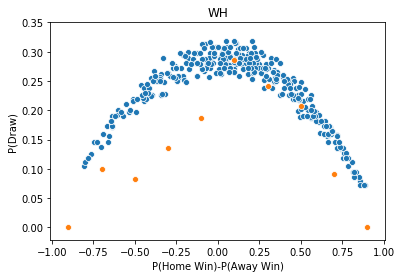

In [229]:
a=sns.scatterplot(x=new_whh-new_wha,y=new_whd)
b=sns.scatterplot(x=wh_points["points_wh"],y=actl_prob_wh)
a.set_xlabel("P(Home Win)-P(Away Win)")
a.set_ylabel("P(Draw)")
a.set_title("WH");

In [239]:
df["ps_prob"]=new_psh-new_psa

In [240]:
df["ps_prob"]

0      0.489448
1      0.303796
2      0.065209
3     -0.451328
4     -0.214949
         ...   
375    0.648039
376    0.658818
377    0.545368
378    0.196429
379    0.139420
Name: ps_prob, Length: 380, dtype: float64

In [241]:
ps1=df[(df["FTR"]=="D") & (df["ps_prob"]>=-1)  & (df["ps_prob"]<-0.8)].index

ps2=df[(df["FTR"]=="D") & (df["ps_prob"]>=-0.8)  & (df["ps_prob"]<-0.6)].index

ps3=df[(df["FTR"]=="D") & (df["ps_prob"]>=-0.6)  & (df["ps_prob"]<-0.4)].index

ps4=df[(df["FTR"]=="D") & (df["ps_prob"]>=-0.4)  & (df["ps_prob"]<-0.2)].index

ps5=df[(df["FTR"]=="D") & (df["ps_prob"]>=-0.2)  & (df["ps_prob"]<-2.22e-16)].index

ps6=df[(df["FTR"]=="D") & (df["ps_prob"]>=-2.22e-16)  & (df["ps_prob"]<0.2)].index

ps7=df[(df["FTR"]=="D") & (df["ps_prob"]>=0.2)  & (df["ps_prob"]<0.4)].index

ps8=df[(df["FTR"]=="D") & (df["ps_prob"]>=0.4)  & (df["ps_prob"]<0.6)].index

ps9=df[(df["FTR"]=="D") & (df["ps_prob"]>=0.6)  & (df["ps_prob"]<0.8)].index

ps10=df[(df["FTR"]=="D") & (df["ps_prob"]>=0.8)  & (df["ps_prob"]<1)].index


In [242]:
ps_rows = [[len(ps1)],[len(ps2)],[len(ps3)],[len(ps4)],[(len(ps5))],[len(ps6)],[len(ps7)],[len(ps8)],[len(ps9)],[len(ps10)]]

In [243]:
df_ps = pd.DataFrame(ps_rows, columns=["num_ps"])

In [244]:
step = 0.2
bin_range = np.arange(-1, 1+step, step)
ps_rng,bins=pd.cut((new_psh-new_psa),bins=bin_range,include_lowest=True, right=False,retbins=True)

In [245]:
sorted_ps=ps_rng.value_counts(sort=True)
sorted_ps = sorted_ps.reindex(natsorted(sorted_ps.index))

In [246]:
print(sorted_ps)

[-1.0, -0.8)          1
[-0.8, -0.6)         21
[-0.6, -0.4)         26
[-0.4, -0.2)         34
[-0.2, -2.22e-16)    51
[-2.22e-16, 0.2)     74
[0.2, 0.4)           61
[0.4, 0.6)           54
[0.6, 0.8)           46
[0.8, 1.0)           12
dtype: int64


In [247]:
df_sorted_ps = sorted_ps.to_frame("counts")

In [248]:
df_ps.reset_index(drop=True, inplace=True)
df_sorted_ps.reset_index(drop=True, inplace=True)

In [250]:
actl_prob_ps=df_ps["num_ps"]/df_sorted_ps["counts"]

In [251]:
actl_prob_ps

0    0.000000
1    0.095238
2    0.115385
3    0.117647
4    0.176471
5    0.297297
6    0.229508
7    0.240741
8    0.086957
9    0.000000
dtype: float64

In [252]:
pointsps = [[-0.9],[-0.7],[-0.5],[-0.3],[-0.1],[0.1],[0.3],[0.5],[0.7],[0.9]]

In [253]:
ps_points = pd.DataFrame(pointsps, columns=["points_ps"])

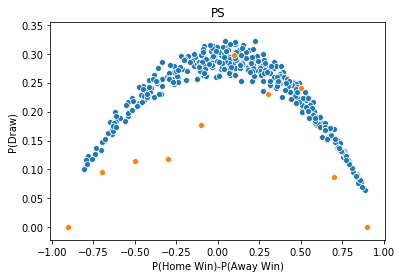

In [254]:
c=sns.scatterplot(x=new_psh-new_psa,y=new_psd)
d=sns.scatterplot(x=ps_points["points_ps"],y=actl_prob_ps)
c.set_xlabel("P(Home Win)-P(Away Win)")
c.set_ylabel("P(Draw)")
c.set_title("PS");

In [256]:
df["iw_prob"]=new_iwh-new_iwa

In [257]:
df["iw_prob"]

0      0.477850
1      0.267454
2      0.073378
3     -0.458015
4     -0.205885
         ...   
375    0.621011
376    0.638170
377    0.534819
378    0.198995
379    0.120750
Name: iw_prob, Length: 380, dtype: float64

In [258]:
iw1=df[(df["FTR"]=="D") & (df["iw_prob"]>=-1)  & (df["iw_prob"]<-0.8)].index

iw2=df[(df["FTR"]=="D") & (df["iw_prob"]>=-0.8)  & (df["iw_prob"]<-0.6)].index

iw3=df[(df["FTR"]=="D") & (df["iw_prob"]>=-0.6)  & (df["iw_prob"]<-0.4)].index

iw4=df[(df["FTR"]=="D") & (df["iw_prob"]>=-0.4)  & (df["iw_prob"]<-0.2)].index

iw5=df[(df["FTR"]=="D") & (df["iw_prob"]>=-0.2)  & (df["iw_prob"]<-2.22e-16)].index

iw6=df[(df["FTR"]=="D") & (df["iw_prob"]>=-2.22e-16)  & (df["iw_prob"]<0.2)].index

iw7=df[(df["FTR"]=="D") & (df["iw_prob"]>=0.2)  & (df["iw_prob"]<0.4)].index

iw8=df[(df["FTR"]=="D") & (df["iw_prob"]>=0.4)  & (df["iw_prob"]<0.6)].index

iw9=df[(df["FTR"]=="D") & (df["iw_prob"]>=0.6)  & (df["iw_prob"]<0.8)].index

iw10=df[(df["FTR"]=="D") & (df["iw_prob"]>=0.8)  & (df["iw_prob"]<1)].index


In [265]:
iw_rows = [[len(iw1)],[len(iw2)],[len(iw3)],[len(iw4)],[(len(iw5))],[len(iw6)],[len(iw7)],[len(iw8)],[len(iw9)],[len(iw10)]]

In [266]:
df_iw = pd.DataFrame(iw_rows, columns=["num_iw"])

In [267]:
step = 0.2
bin_range = np.arange(-1, 1+step, step)
iw_rng,bins=pd.cut((new_iwh-new_iwa),bins=bin_range,include_lowest=True, right=False,retbins=True)

In [268]:
sorted_iw=iw_rng.value_counts(sort=True)
sorted_iw = sorted_iw.reindex(natsorted(sorted_iw.index))

In [269]:
print(sorted_iw)

[-1.0, -0.8)          0
[-0.8, -0.6)         17
[-0.6, -0.4)         25
[-0.4, -0.2)         38
[-0.2, -2.22e-16)    50
[-2.22e-16, 0.2)     83
[0.2, 0.4)           68
[0.4, 0.6)           48
[0.6, 0.8)           46
[0.8, 1.0)            5
dtype: int64


In [270]:
df_sorted_iw = sorted_iw.to_frame("counts")

In [271]:
df_iw.reset_index(drop=True, inplace=True)
df_sorted_iw.reset_index(drop=True, inplace=True)

In [272]:
actl_prob_iw=df_iw["num_iw"]/df_sorted_iw["counts"]

In [273]:
actl_prob_iw

0         NaN
1    0.117647
2    0.120000
3    0.078947
4    0.220000
5    0.240964
6    0.279412
7    0.187500
8    0.086957
9    0.000000
dtype: float64

In [274]:
pointsiw = [[-0.9],[-0.7],[-0.5],[-0.3],[-0.1],[0.1],[0.3],[0.5],[0.7],[0.9]]

In [275]:
iw_points = pd.DataFrame(pointsiw, columns=["points_iw"])

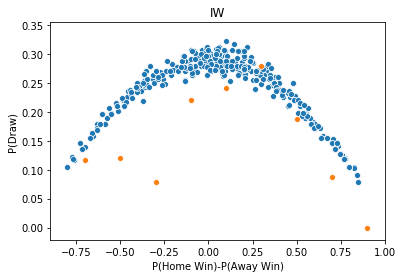

In [276]:
e=sns.scatterplot(x=new_iwh-new_iwa,y=new_iwd)
f=sns.scatterplot(x=iw_points["points_iw"],y=actl_prob_iw)
e.set_xlabel("P(Home Win)-P(Away Win)")
e.set_ylabel("P(Draw)")
e.set_title("IW");

In [277]:
df["bw_prob"]=new_bwh-new_bwa

In [278]:
df["bw_prob"]

0      0.501733
1      0.285426
2      0.065875
3     -0.452785
4     -0.225806
         ...   
375    0.633311
376    0.674740
377    0.537953
378    0.181818
379    0.125993
Name: bw_prob, Length: 380, dtype: float64

In [279]:
bw1=df[(df["FTR"]=="D") & (df["bw_prob"]>=-1)  & (df["bw_prob"]<-0.8)].index

bw2=df[(df["FTR"]=="D") & (df["bw_prob"]>=-0.8)  & (df["bw_prob"]<-0.6)].index

bw3=df[(df["FTR"]=="D") & (df["bw_prob"]>=-0.6)  & (df["bw_prob"]<-0.4)].index

bw4=df[(df["FTR"]=="D") & (df["bw_prob"]>=-0.4)  & (df["bw_prob"]<-0.2)].index

bw5=df[(df["FTR"]=="D") & (df["bw_prob"]>=-0.2)  & (df["bw_prob"]<-2.22e-16)].index

bw6=df[(df["FTR"]=="D") & (df["bw_prob"]>=-2.22e-16)  & (df["bw_prob"]<0.2)].index

bw7=df[(df["FTR"]=="D") & (df["bw_prob"]>=0.2)  & (df["bw_prob"]<0.4)].index

bw8=df[(df["FTR"]=="D") & (df["bw_prob"]>=0.4)  & (df["bw_prob"]<0.6)].index

bw9=df[(df["FTR"]=="D") & (df["bw_prob"]>=0.6)  & (df["bw_prob"]<0.8)].index

bw10=df[(df["FTR"]=="D") & (df["bw_prob"]>=0.8)  & (df["bw_prob"]<1)].index


In [280]:
bw_rows = [[len(bw1)],[len(bw2)],[len(bw3)],[len(bw4)],[(len(bw5))],[len(bw6)],[len(bw7)],[len(bw8)],[len(bw9)],[len(bw10)]]

In [281]:
df_bw = pd.DataFrame(bw_rows, columns=["num_bw"])

In [282]:
step = 0.2
bin_range = np.arange(-1, 1+step, step)
bw_rng,bins=pd.cut((new_bwh-new_bwa),bins=bin_range,include_lowest=True, right=False,retbins=True)

In [283]:
sorted_bw=bw_rng.value_counts(sort=True)
sorted_bw = sorted_bw.reindex(natsorted(sorted_bw.index))

In [284]:
print(sorted_bw)

[-1.0, -0.8)          0
[-0.8, -0.6)         21
[-0.6, -0.4)         26
[-0.4, -0.2)         37
[-0.2, -2.22e-16)    47
[-2.22e-16, 0.2)     81
[0.2, 0.4)           61
[0.4, 0.6)           50
[0.6, 0.8)           48
[0.8, 1.0)            9
dtype: int64


In [286]:
df_sorted_bw = sorted_bw.to_frame("counts")

In [287]:
df_bw.reset_index(drop=True, inplace=True)
df_sorted_bw.reset_index(drop=True, inplace=True)

In [289]:
actl_prob_bw=df_bw["num_bw"]/df_sorted_bw["counts"]

In [290]:
actl_prob_bw

0         NaN
1    0.095238
2    0.115385
3    0.108108
4    0.191489
5    0.271605
6    0.262295
7    0.220000
8    0.083333
9    0.000000
dtype: float64

In [291]:
pointsbw = [[-0.9],[-0.7],[-0.5],[-0.3],[-0.1],[0.1],[0.3],[0.5],[0.7],[0.9]]

In [292]:
bw_points = pd.DataFrame(pointsbw, columns=["points_bw"])

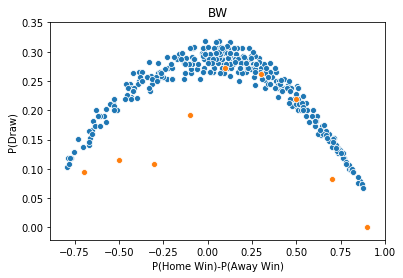

In [293]:
g=sns.scatterplot(x=new_bwh-new_bwa,y=new_bwd)
h=sns.scatterplot(x=bw_points["points_bw"],y=actl_prob_bw)
g.set_xlabel("P(Home Win)-P(Away Win)")
g.set_ylabel("P(Draw)")
g.set_title("BW");

In [ ]:
# The blue points are boomakers prediction while orange points are the actual probabilities. 
#We can conclude that in the long run where orange point is above the blue one,it is likely to make some money for "Draw" in corresponding bin.

In [ ]:
#Task 3

In [294]:
df["HR"].value_counts()

0    362
1     18
Name: HR, dtype: int64

In [295]:
df["AR"].value_counts()

0    352
1     27
2      1
Name: AR, dtype: int64

In [296]:
df[(df["HR"]<1) & (df["AR"]<1)]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,wh_prob,ps_prob,iw_prob,bw_prob
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.70,2.29,2.21,1.55,4.07,7.69,0.440842,0.489448,0.477850,0.501733
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,2.13,1.80,1.75,1.88,3.61,4.70,0.258252,0.303796,0.267454,0.285426
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,2.11,1.81,1.77,2.62,3.38,2.90,0.047757,0.065209,0.073378,0.065875
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.80,2.13,2.06,7.24,3.95,1.58,-0.435864,-0.451328,-0.458015,-0.452785
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,2.12,1.80,1.76,4.74,3.53,1.89,-0.211241,-0.214949,-0.205885,-0.225806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,E0,12/05/2019,Leicester,Chelsea,0,0,D,0,0,D,...,2.38,1.65,1.62,2.42,3.63,2.98,0.069793,0.066861,0.076419,0.070817
375,E0,12/05/2019,Liverpool,Wolves,2,0,H,1,0,H,...,1.91,2.01,1.95,1.32,5.89,9.48,0.652993,0.648039,0.621011,0.633311
376,E0,12/05/2019,Man United,Cardiff,0,2,A,0,1,A,...,2.32,1.72,1.64,1.30,6.06,9.71,0.664234,0.658818,0.638170,0.674740
377,E0,12/05/2019,Southampton,Huddersfield,1,1,D,1,0,H,...,2.16,1.80,1.73,1.37,5.36,8.49,0.561325,0.545368,0.534819,0.537953


In [297]:
removed_df=df[(df["HR"]<1) & (df["AR"]<1)]

In [298]:
removed_df.shape  #First we have 380 matches and now we have 336 matches with no red card.

(336, 66)

In [299]:
#removed_BW

In [300]:
rem_bwh=1/removed_df["BWH"]

In [301]:
rem_bwh.head()

0    0.653595
1    0.526316
2    0.408163
3    0.160000
4    0.263158
Name: BWH, dtype: float64

In [302]:
rem_bwd=1/removed_df["BWD"]

In [303]:
rem_bwd.head()

0    0.250000
1    0.294118
2    0.303030
3    0.256410
4    0.285714
Name: BWD, dtype: float64

In [304]:
rem_bwa=1/removed_df["BWA"]
rem_bwa.head()

0    0.133333
1    0.227273
2    0.338983
3    0.636943
4    0.500000
Name: BWA, dtype: float64

In [305]:
#Calculating rem_BW values using Normalization

In [306]:
rem_tbw=rem_bwh+rem_bwa+rem_bwd

In [307]:
rem_tbw_=1/rem_tbw

In [308]:
rem_new_bwh=rem_tbw_*rem_bwh

In [309]:
rem_new_bwd=rem_tbw_*rem_bwd

In [310]:
rem_new_bwa=rem_tbw_*rem_bwa

In [311]:
#removed_IW

In [312]:
rem_iwh=1/removed_df["IWH"]
rem_iwh.head()

0    0.645161
1    0.526316
2    0.416667
3    0.161290
4    0.270270
Name: IWH, dtype: float64

In [313]:
rem_iwd=1/removed_df["IWD"]
rem_iwd.head()

0    0.263158
1    0.285714
2    0.303030
3    0.250000
4    0.298507
Name: IWD, dtype: float64

In [314]:
rem_iwa=1/removed_df["IWA"]
rem_iwa.head()

0    0.142857
1    0.243902
2    0.338983
3    0.645161
4    0.487805
Name: IWA, dtype: float64

In [315]:
#Calculating rem_IW values using Normalization

In [316]:
rem_tiw=rem_iwh+rem_iwd+rem_iwa

In [317]:
rem_tiw_=1/rem_tiw

In [318]:
rem_new_iwh=rem_tiw_*rem_iwh

In [319]:
rem_new_iwd=rem_tiw_*rem_iwd

In [320]:
rem_new_iwa=rem_tiw_*rem_iwa

In [321]:
#rem_PS

In [322]:
rem_psh=1/removed_df["PSH"]
rem_psh.head()

0    0.632911
1    0.529101
2    0.400000
3    0.156006
4    0.261097
Name: PSH, dtype: float64

In [323]:
rem_psd=1/removed_df["PSD"]
rem_psd.head()

0    0.254453
1    0.275482
2    0.289017
3    0.248756
4    0.280112
Name: PSD, dtype: float64

In [324]:
rem_psa=1/removed_df["PSA"]
rem_psa.head()

0    0.133333
1    0.218341
2    0.333333
3    0.617284
4    0.480769
Name: PSA, dtype: float64

In [325]:
#Calculating rem_PS values using Normalization

In [326]:
rem_tps=rem_psh+rem_psd+rem_psa

In [327]:
rem_tps_=1/rem_tps

In [328]:
rem_new_psh=rem_tps_*rem_psh

In [329]:
rem_new_psd=rem_tps_*rem_psd

In [330]:
rem_new_psa=rem_tps_*rem_psa

In [331]:
#rem_WH

In [332]:
rem_whh=1/removed_df["WHH"]
rem_whh.head()

0    0.636943
1    0.523560
2    0.408163
3    0.172414
4    0.263158
Name: WHH, dtype: float64

In [333]:
rem_whd=1/removed_df["WHD"]
rem_whd.head()

0    0.263158
1    0.285714
2    0.303030
3    0.256410
4    0.312500
Name: WHD, dtype: float64

In [334]:
rem_wha=1/removed_df["WHA"]
rem_wha.head()

0    0.166667
1    0.250000
2    0.357143
3    0.636943
4    0.487805
Name: WHA, dtype: float64

In [335]:
#Calculating rem_WH values using Normalization

In [336]:
rem_twh=rem_whh+rem_wha+rem_whd

In [337]:
rem_twh_=1/rem_twh

In [338]:
rem_new_whh=rem_twh_*rem_whh

In [339]:
rem_new_whd=rem_twh_*rem_whd

In [340]:
rem_new_wha=rem_twh_*rem_wha

In [341]:
df["rem_wh_prob"]=rem_new_whh-rem_new_wha

In [342]:
df["rem_wh_prob"]

0      0.440842
1      0.258252
2      0.047757
3     -0.435864
4     -0.211241
         ...   
375    0.652993
376    0.664234
377    0.561325
378    0.181818
379         NaN
Name: rem_wh_prob, Length: 380, dtype: float64

In [343]:
rem_wh1=df[(df["FTR"]=="D") & (df["rem_wh_prob"]>=-1)  & (df["rem_wh_prob"]<-0.8)].index

rem_wh2=df[(df["FTR"]=="D") & (df["rem_wh_prob"]>=-0.8)  & (df["rem_wh_prob"]<-0.6)].index    

rem_wh3=df[(df["FTR"]=="D") & (df["rem_wh_prob"]>=-0.6)  & (df["rem_wh_prob"]<-0.4)].index

rem_wh4=df[(df["FTR"]=="D") & (df["rem_wh_prob"]>=-0.4)  & (df["rem_wh_prob"]<-0.2)].index

rem_wh5=df[(df["FTR"]=="D") & (df["rem_wh_prob"]>=-0.2)  & (df["rem_wh_prob"]<-2.22e-16)].index

rem_wh6=df[(df["FTR"]=="D") & (df["rem_wh_prob"]>=-2.22e-16)  & (df["rem_wh_prob"]<0.2)].index

rem_wh7=df[(df["FTR"]=="D") & (df["rem_wh_prob"]>=0.2)  & (df["rem_wh_prob"]<0.4)].index

rem_wh8=df[(df["FTR"]=="D") & (df["rem_wh_prob"]>=0.4)  & (df["rem_wh_prob"]<0.6)].index

rem_wh9=df[(df["FTR"]=="D") & (df["rem_wh_prob"]>=0.6)  & (df["rem_wh_prob"]<0.8)].index

rem_wh10=df[(df["FTR"]=="D") & (df["rem_wh_prob"]>=0.8)  & (df["rem_wh_prob"]<1)].index


In [345]:
rem_wh_rows = [[len(rem_wh1)],[len(rem_wh2)],[len(rem_wh3)],[len(rem_wh4)],[(len(rem_wh5))],[len(rem_wh6)],[len(rem_wh7)],[len(rem_wh8)],[len(rem_wh9)],[len(rem_wh10)]]

In [346]:
rem_df_wh = pd.DataFrame(rem_wh_rows, columns=["rem_num_wh"])

In [347]:
step = 0.2
bin_range = np.arange(-1, 1+step, step)
rem_wh_rng,bins=pd.cut((rem_new_whh-rem_new_wha),bins=bin_range,include_lowest=True, right=False,retbins=True)  #making bins

In [348]:
rem_sorted_wh=rem_wh_rng.value_counts(sort=True)                         #sorting bins
rem_sorted_wh = rem_sorted_wh.reindex(natsorted(rem_sorted_wh.index))

In [349]:
print(rem_sorted_wh)   

[-1.0, -0.8)          1
[-0.8, -0.6)         18
[-0.6, -0.4)         21
[-0.4, -0.2)         33
[-0.2, -2.22e-16)    40
[-2.22e-16, 0.2)     67
[0.2, 0.4)           53
[0.4, 0.6)           51
[0.6, 0.8)           41
[0.8, 1.0)           11
dtype: int64


In [352]:
rem_df_sorted_wh = rem_sorted_wh.to_frame("counts")

In [353]:
rem_df_wh.reset_index(drop=True, inplace=True)
rem_df_sorted_wh.reset_index(drop=True, inplace=True)

In [354]:
rem_actl_prob_wh=rem_df_wh["rem_num_wh"]/rem_df_sorted_wh["counts"]   #Number of games resulted "Draw" dividing by total number of games corresponding bin

In [355]:
rem_actl_prob_wh

0    0.000000
1    0.111111
2    0.095238
3    0.151515
4    0.175000
5    0.283582
6    0.245283
7    0.215686
8    0.097561
9    0.000000
dtype: float64

In [356]:
rem_pointswh = [[-0.9],[-0.7],[-0.5],[-0.3],[-0.1],[0.1],[0.3],[0.5],[0.7],[0.9]]  #the middle of intervals was chosen as point.

In [357]:
rem_wh_points = pd.DataFrame(rem_pointswh, columns=["rem_points_wh"])

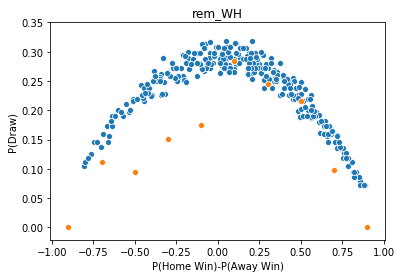

In [359]:
j=sns.scatterplot(x=rem_new_whh-rem_new_wha,y=rem_new_whd)
k=sns.scatterplot(x=rem_wh_points["rem_points_wh"],y=rem_actl_prob_wh)
j.set_xlabel("P(Home Win)-P(Away Win)")
j.set_ylabel("P(Draw)")
j.set_title("rem_WH");

In [360]:
df["rem_ps_prob"]=rem_new_psh-rem_new_psa

In [362]:
df["rem_ps_prob"]

0      0.489448
1      0.303796
2      0.065209
3     -0.451328
4     -0.214949
         ...   
375    0.648039
376    0.658818
377    0.545368
378    0.196429
379         NaN
Name: rem_ps_prob, Length: 380, dtype: float64

In [363]:
rem_ps1=df[(df["FTR"]=="D") & (df["rem_ps_prob"]>=-1)  & (df["rem_ps_prob"]<-0.8)].index

rem_ps2=df[(df["FTR"]=="D") & (df["rem_ps_prob"]>=-0.8)  & (df["rem_ps_prob"]<-0.6)].index    

rem_ps3=df[(df["FTR"]=="D") & (df["rem_ps_prob"]>=-0.6)  & (df["rem_ps_prob"]<-0.4)].index

rem_ps4=df[(df["FTR"]=="D") & (df["rem_ps_prob"]>=-0.4)  & (df["rem_ps_prob"]<-0.2)].index

rem_ps5=df[(df["FTR"]=="D") & (df["rem_ps_prob"]>=-0.2)  & (df["rem_ps_prob"]<-2.22e-16)].index

rem_ps6=df[(df["FTR"]=="D") & (df["rem_ps_prob"]>=-2.22e-16)  & (df["rem_ps_prob"]<0.2)].index

rem_ps7=df[(df["FTR"]=="D") & (df["rem_ps_prob"]>=0.2)  & (df["rem_ps_prob"]<0.4)].index

rem_ps8=df[(df["FTR"]=="D") & (df["rem_ps_prob"]>=0.4)  & (df["rem_ps_prob"]<0.6)].index

rem_ps9=df[(df["FTR"]=="D") & (df["rem_ps_prob"]>=0.6)  & (df["rem_ps_prob"]<0.8)].index

rem_ps10=df[(df["FTR"]=="D") & (df["rem_ps_prob"]>=0.8)  & (df["rem_ps_prob"]<1)].index


In [364]:
rem_ps_rows = [[len(rem_ps1)],[len(rem_ps2)],[len(rem_ps3)],[len(rem_ps4)],[(len(rem_ps5))],[len(rem_ps6)],[len(rem_ps7)],[len(rem_ps8)],[len(rem_ps9)],[len(rem_ps10)]]

In [365]:
rem_df_ps = pd.DataFrame(rem_ps_rows, columns=["rem_num_ps"])

In [366]:
step = 0.2
bin_range = np.arange(-1, 1+step, step)
rem_ps_rng,bins=pd.cut((rem_new_psh-rem_new_psa),bins=bin_range,include_lowest=True, right=False,retbins=True)  #making bins

In [367]:
rem_sorted_ps=rem_ps_rng.value_counts(sort=True)                         #sorting bins
rem_sorted_ps = rem_sorted_ps.reindex(natsorted(rem_sorted_ps.index))

In [368]:
print(rem_sorted_ps)   

[-1.0, -0.8)          1
[-0.8, -0.6)         19
[-0.6, -0.4)         23
[-0.4, -0.2)         30
[-0.2, -2.22e-16)    43
[-2.22e-16, 0.2)     58
[0.2, 0.4)           55
[0.4, 0.6)           54
[0.6, 0.8)           41
[0.8, 1.0)           12
dtype: int64


In [369]:
rem_df_sorted_ps = rem_sorted_ps.to_frame("counts")

In [370]:
rem_df_ps.reset_index(drop=True, inplace=True)
rem_df_sorted_ps.reset_index(drop=True, inplace=True)

In [371]:
rem_actl_prob_ps=rem_df_ps["rem_num_ps"]/rem_df_sorted_ps["counts"]   #Number of games resulted "Draw" dividing by total number of games corresponding bin

In [372]:
rem_actl_prob_ps

0    0.000000
1    0.105263
2    0.130435
3    0.133333
4    0.162791
5    0.293103
6    0.236364
7    0.240741
8    0.097561
9    0.000000
dtype: float64

In [373]:
rem_pointsps = [[-0.9],[-0.7],[-0.5],[-0.3],[-0.1],[0.1],[0.3],[0.5],[0.7],[0.9]]  #the middle of intervals was chosen as point.

In [374]:
rem_ps_points = pd.DataFrame(rem_pointsps, columns=["rem_points_ps"])

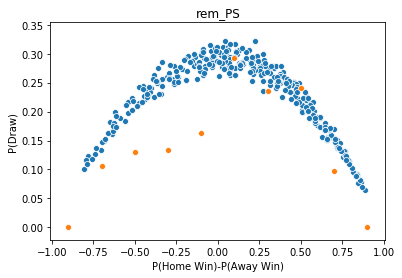

In [406]:
l=sns.scatterplot(x=rem_new_psh-rem_new_psa,y=rem_new_psd)
m=sns.scatterplot(x=rem_ps_points["rem_points_ps"],y=rem_actl_prob_ps)
l.set_xlabel("P(Home Win)-P(Away Win)")
l.set_ylabel("P(Draw)")
l.set_title("rem_PS");

In [388]:
df["rem_iw_prob"]=rem_new_iwh-rem_new_iwa

In [389]:
df["rem_iw_prob"]

0      0.477850
1      0.267454
2      0.073378
3     -0.458015
4     -0.205885
         ...   
375    0.621011
376    0.638170
377    0.534819
378    0.198995
379         NaN
Name: rem_iw_prob, Length: 380, dtype: float64

In [390]:
rem_iw1=df[(df["FTR"]=="D") & (df["rem_iw_prob"]>=-1)  & (df["rem_iw_prob"]<-0.8)].index

rem_iw2=df[(df["FTR"]=="D") & (df["rem_iw_prob"]>=-0.8)  & (df["rem_iw_prob"]<-0.6)].index    

rem_iw3=df[(df["FTR"]=="D") & (df["rem_iw_prob"]>=-0.6)  & (df["rem_iw_prob"]<-0.4)].index

rem_iw4=df[(df["FTR"]=="D") & (df["rem_iw_prob"]>=-0.4)  & (df["rem_iw_prob"]<-0.2)].index

rem_iw5=df[(df["FTR"]=="D") & (df["rem_iw_prob"]>=-0.2)  & (df["rem_iw_prob"]<-2.22e-16)].index

rem_iw6=df[(df["FTR"]=="D") & (df["rem_iw_prob"]>=-2.22e-16)  & (df["rem_iw_prob"]<0.2)].index

rem_iw7=df[(df["FTR"]=="D") & (df["rem_iw_prob"]>=0.2)  & (df["rem_iw_prob"]<0.4)].index

rem_iw8=df[(df["FTR"]=="D") & (df["rem_iw_prob"]>=0.4)  & (df["rem_iw_prob"]<0.6)].index

rem_iw9=df[(df["FTR"]=="D") & (df["rem_iw_prob"]>=0.6)  & (df["rem_iw_prob"]<0.8)].index

rem_iw10=df[(df["FTR"]=="D") & (df["rem_iw_prob"]>=0.8)  & (df["rem_iw_prob"]<1)].index


In [391]:
rem_iw_rows = [[len(rem_iw1)],[len(rem_iw2)],[len(rem_iw3)],[len(rem_iw4)],[(len(rem_iw5))],[len(rem_iw6)],[len(rem_iw7)],[len(rem_iw8)],[len(rem_iw9)],[len(rem_iw10)]]

In [392]:
rem_df_iw = pd.DataFrame(rem_iw_rows, columns=["rem_num_iw"])

In [393]:
step = 0.2
bin_range = np.arange(-1, 1+step, step)
rem_iw_rng,bins=pd.cut((rem_new_iwh-rem_new_iwa),bins=bin_range,include_lowest=True, right=False,retbins=True)  #making bins

In [394]:
rem_sorted_iw=rem_iw_rng.value_counts(sort=True)                         #sorting bins
rem_sorted_iw = rem_sorted_iw.reindex(natsorted(rem_sorted_iw.index))

In [395]:
print(rem_sorted_iw)   

[-1.0, -0.8)          0
[-0.8, -0.6)         17
[-0.6, -0.4)         21
[-0.4, -0.2)         33
[-0.2, -2.22e-16)    44
[-2.22e-16, 0.2)     65
[0.2, 0.4)           62
[0.4, 0.6)           48
[0.6, 0.8)           41
[0.8, 1.0)            5
dtype: int64


In [396]:
rem_df_sorted_iw = rem_sorted_iw.to_frame("counts")

In [397]:
rem_df_iw.reset_index(drop=True, inplace=True)
rem_df_sorted_iw.reset_index(drop=True, inplace=True)

In [398]:
rem_actl_prob_iw=rem_df_iw["rem_num_iw"]/rem_df_sorted_iw["counts"]   #Number of games resulted "Draw" dividing by total number of games corresponding bin

In [399]:
rem_actl_prob_iw

0         NaN
1    0.117647
2    0.142857
3    0.090909
4    0.204545
5    0.246154
6    0.274194
7    0.187500
8    0.097561
9    0.000000
dtype: float64

In [401]:
rem_pointsiw = [[-0.9],[-0.7],[-0.5],[-0.3],[-0.1],[0.1],[0.3],[0.5],[0.7],[0.9]]  #the middle of intervals was chosen as point.

In [402]:
rem_iw_points = pd.DataFrame(rem_pointsiw, columns=["rem_points_iw"])

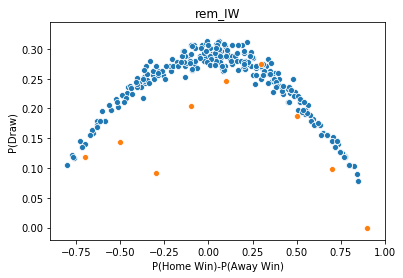

In [407]:
r=sns.scatterplot(x=rem_new_iwh-rem_new_iwa,y=rem_new_iwd)
s=sns.scatterplot(x=rem_iw_points["rem_points_iw"],y=rem_actl_prob_iw)
r.set_xlabel("P(Home Win)-P(Away Win)")
r.set_ylabel("P(Draw)")
r.set_title("rem_IW");

In [409]:
df["rem_bw_prob"]=rem_new_bwh-rem_new_bwa

In [410]:
df["rem_bw_prob"]

0      0.501733
1      0.285426
2      0.065875
3     -0.452785
4     -0.225806
         ...   
375    0.633311
376    0.674740
377    0.537953
378    0.181818
379         NaN
Name: rem_bw_prob, Length: 380, dtype: float64

In [411]:
rem_bw1=df[(df["FTR"]=="D") & (df["rem_bw_prob"]>=-1)  & (df["rem_bw_prob"]<-0.8)].index

rem_bw2=df[(df["FTR"]=="D") & (df["rem_bw_prob"]>=-0.8)  & (df["rem_bw_prob"]<-0.6)].index    

rem_bw3=df[(df["FTR"]=="D") & (df["rem_bw_prob"]>=-0.6)  & (df["rem_bw_prob"]<-0.4)].index

rem_bw4=df[(df["FTR"]=="D") & (df["rem_bw_prob"]>=-0.4)  & (df["rem_bw_prob"]<-0.2)].index

rem_bw5=df[(df["FTR"]=="D") & (df["rem_bw_prob"]>=-0.2)  & (df["rem_bw_prob"]<-2.22e-16)].index

rem_bw6=df[(df["FTR"]=="D") & (df["rem_bw_prob"]>=-2.22e-16)  & (df["rem_bw_prob"]<0.2)].index

rem_bw7=df[(df["FTR"]=="D") & (df["rem_bw_prob"]>=0.2)  & (df["rem_bw_prob"]<0.4)].index

rem_bw8=df[(df["FTR"]=="D") & (df["rem_bw_prob"]>=0.4)  & (df["rem_bw_prob"]<0.6)].index

rem_bw9=df[(df["FTR"]=="D") & (df["rem_bw_prob"]>=0.6)  & (df["rem_bw_prob"]<0.8)].index

rem_bw10=df[(df["FTR"]=="D") & (df["rem_bw_prob"]>=0.8)  & (df["rem_bw_prob"]<1)].index


In [412]:
rem_bw_rows = [[len(rem_bw1)],[len(rem_bw2)],[len(rem_bw3)],[len(rem_bw4)],[(len(rem_bw5))],[len(rem_bw6)],[len(rem_bw7)],[len(rem_bw8)],[len(rem_bw9)],[len(rem_bw10)]]

In [413]:
rem_df_bw = pd.DataFrame(rem_bw_rows, columns=["rem_num_bw"])

In [414]:
step = 0.2
bin_range = np.arange(-1, 1+step, step)
rem_bw_rng,bins=pd.cut((rem_new_bwh-rem_new_bwa),bins=bin_range,include_lowest=True, right=False,retbins=True)  #making bins

In [415]:
rem_sorted_bw=rem_bw_rng.value_counts(sort=True)                         #sorting bins
rem_sorted_bw = rem_sorted_bw.reindex(natsorted(rem_sorted_iw.index))

In [416]:
print(rem_sorted_bw)   

[-1.0, -0.8)          0
[-0.8, -0.6)         20
[-0.6, -0.4)         22
[-0.4, -0.2)         33
[-0.2, -2.22e-16)    39
[-2.22e-16, 0.2)     64
[0.2, 0.4)           56
[0.4, 0.6)           50
[0.6, 0.8)           43
[0.8, 1.0)            9
dtype: int64


In [417]:
rem_df_sorted_bw = rem_sorted_bw.to_frame("counts")

In [418]:
rem_df_bw.reset_index(drop=True, inplace=True)
rem_df_sorted_bw.reset_index(drop=True, inplace=True)

In [419]:
rem_actl_prob_bw=rem_df_bw["rem_num_bw"]/rem_df_sorted_bw["counts"]   #Number of games resulted "Draw" dividing by total number of games corresponding bin

In [420]:
rem_actl_prob_bw

0         NaN
1    0.100000
2    0.136364
3    0.121212
4    0.179487
5    0.265625
6    0.267857
7    0.220000
8    0.093023
9    0.000000
dtype: float64

In [421]:
rem_pointsbw = [[-0.9],[-0.7],[-0.5],[-0.3],[-0.1],[0.1],[0.3],[0.5],[0.7],[0.9]]  #the middle of intervals was chosen as point.

In [422]:
rem_bw_points = pd.DataFrame(rem_pointsbw, columns=["rem_points_bw"])

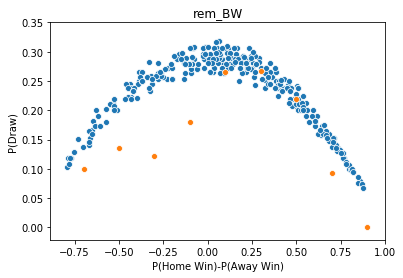

In [423]:
q=sns.scatterplot(x=rem_new_bwh-rem_new_bwa,y=rem_new_bwd)
w=sns.scatterplot(x=rem_bw_points["rem_points_bw"],y=rem_actl_prob_bw)
q.set_xlabel("P(Home Win)-P(Away Win)")
q.set_ylabel("P(Draw)")
q.set_title("rem_BW");

In [ ]:
# I would say that the red cards doesn't change my results significantly. Also, from previous analysis, it shows that while difference between P(Home)-P(Away) 
#approximates to zero, betting on draw is more likely to bring money.